# Link to our video
[Google Drive](https://drive.google.com/drive/folders/1rvTVlwdQYUjzBsleMMcUJdrs8AFMKYiF?usp=sharing)

**Quantum Entanglement**

**when is a entanglement?**

entanglement is among the properties of quantum mechanics (mainly used for quantum computing) 
where two qubits (fundamental quantum bit) 
are entangled (correlated) where even they are separated they still tell something about the other no matter how far they are
thats weird right! 
thats why Einstein called that **spooky action at a distance!**


**what is a bell state?**

Bell states are the four states that can be created when two qubits are maximally entangled.
The four states are represented as,

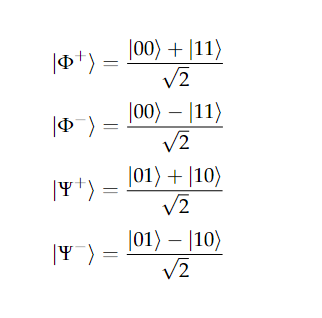

**How does one create a entanglement on a real quantum computer?**

As two qubits are entangled means that one qubit tells something about the other for the same reason to construct a quantum entanglement in the circuit we use the type of a gate which can be applied on both qubits at a time and state of the one matters the other one for the same reason we use CNOT/CX gate!(ofc with a hadamrd or a flip/not gate!)


**importing libraries to run a circuit on simulator as well as on a real hardware**

In [ ]:
!qbraid jobs enable amazon_braket 
#to enable jobs for real hardware and simulator via amazon braket

In [ ]:
# general imports
import numpy as np
import matplotlib.pyplot as plt
# magic word for producing visualizations in notebook
%matplotlib inline
import string
import time

# AWS imports: Import Braket SDK modules
from braket.circuits import Circuit, Gate, Instruction, circuit, Observable
from braket.devices import LocalSimulator
from braket.aws import AwsDevice, AwsQuantumTask
s3_folder = ("dummy_variable", "dummy_variable")

In [ ]:
# print all (the usual suspects) available gates currently available within SDK
gate_set = [attr for attr in dir(Gate) if attr[0] in string.ascii_uppercase]
print('Gate set supported by SDK:\n', gate_set)
print('\n') 

# the Rigetti device
device = AwsDevice("arn:aws:braket:us-west-1::device/qpu/rigetti/Aspen-M-1")
supported_gates = device.properties.action['braket.ir.jaqcd.program'].supportedOperations
# print the supported gate set
print('Gate set supported by the Rigetti device:\n', supported_gates)
print('\n') 

# the IonQ device
device = AwsDevice("arn:aws:braket:::device/qpu/ionq/ionQdevice")
supported_gates = device.properties.action['braket.ir.jaqcd.program'].supportedOperations
# print the supported gate set
print('Gate set supported by the IonQ device:\n', supported_gates)
print('\n') 

# the Oxford Quantum Circuits (OQC) device
device = AwsDevice("arn:aws:braket:eu-west-2::device/qpu/oqc/Lucy")
supported_gates = device.properties.action['braket.ir.jaqcd.program'].supportedOperations
# print the supported gate set
print('Gate set supported by the OQC device:\n', supported_gates)

**LETS BUILD THE CIRCUIT!!**

here we will try to create the first bell state and try to understand the entanglement!

In [ ]:
#defining the circuit
bell = Circuit().h.(0).cnot(0, 1)

In [ ]:
#print circuit to check if the proper gates are applied on both qubits
print = (bell, type(bell))

 This will entangle the two qubits such that the combined state becomes
 
 
 
 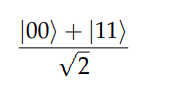

In [ ]:
#run this on local simulator 
device = Local simualtor()

In [ ]:
# run circuit (execute single TASK)
result = device.run(bell, shots=100).result()
# get measurement shots
counts = result.measurement_counts
# print counts
print(counts)

In [ ]:
# plot using result
plt.bar(counts.keys(), counts.values())
plt.xlabel('bitstrings')
plt.ylabel('counts')

From the above result we can see that theres a 50 50 probablity of getting 11 or 00 state at the end this happened here because quantum computers are highly unstable and they tend to collapse easily to a classical form of them

**now lets run the same circuit on a real quantum device**

Now we submit our circuit to the superconducting quantum chip provided by Rigetti. Depending on our position in the queue, we may have to wait for some time till our circuit is actually run.

In [ ]:
# set up device
rigetti = AwsDevice("arn:aws:braket:us-west-1::device/qpu/rigetti/Aspen-M-2")

# create a clean circuit with no result type attached.(This is because some result types are only supported when shots=0)
bell = Circuit().h(0).cnot(0, 1)  

# add the Z \otimes Z expectation value
bell.expectation(Observable.Z() @ Observable.Z(), target=[0,1])

# run circuit 
rigetti_task = rigetti.run(bell, s3_folder,shots=1000)

# get id and status of submitted task
rigetti_task_id = rigetti_task.id
rigetti_status = rigetti_task.state()
# print('ID of task:', rigetti_task_id)
print('Status of task:', rigetti_status)

The task is submitted and we can regularly (or irregularly) check the status of this task by executing the following cell.

In [ ]:
# print status
status = rigetti_task.state()
print('Status of (reconstructed) task:', status)

**loading completed task with graph plots**


In [ ]:
task_load = AwsQuantumTask(arn="")

# print status
status = task_load.state()
print('Status of (reconstructed) task:', status)
print('\n')
# wait for job to complete
# terminal_states = ['COMPLETED', 'FAILED', 'CANCELLED']
if status == 'COMPLETED':
    # get results
    results = task_load.result()
    # print(results)
    
    # get all metadata of submitted task
    metadata = task_load.metadata()
    # example for metadata
    shots = metadata['shots']
    machine = metadata['deviceArn']
    # print example metadata
    print("{} shots taken on machine {}.\n".format(shots, machine))
    
    # get measurement counts
    counts = results.measurement_counts
    print('Measurement counts:', counts)

    # plot results: see effects of noise
    plt.bar(counts.keys(), counts.values())
    plt.xlabel('bitstrings')
    plt.ylabel('counts')
    plt.tight_layout()
    plt.savefig('AWS_QC_results.png', dpi=700)
    
elif status in ['FAILED', 'CANCELLED']:
    # print terminal message 
    print('Your task is in terminal status, but has not completed.')

else:
    # print current status
    print('Sorry, your task is still being processed and has not been finalized yet.')

here we can see that the there are some outputs which are ideally not supposed to be obtained but due to exernal factors and 